In [1]:
import pandas as pd
import datetime as dt
import geopandas as gpd
import shapely
import numpy as np

In [2]:
raw_data = pd.read_csv('https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=1000000&$offset=0&$order=crash_date%20DESC')

In [3]:
raw_data.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2022-11-13T00:00:00.000,22:35,QUEENS,11379.0,40.724064,-73.87014,"\n, \n(40.724064, -73.87014)",NaN,NaN,84-45 63 AVENUE,...,Unspecified,NaN,NaN,NaN,4581554,Sedan,Sedan,NaN,NaN,NaN
1,2022-11-13T00:00:00.000,17:00,NaN,NaN,40.666306,-73.79171,"\n, \n(40.666306, -73.79171)",BELT PARKWAY,NaN,NaN,...,Unsafe Speed,NaN,NaN,NaN,4581517,Sedan,Sedan,NaN,NaN,NaN
2,2022-11-13T00:00:00.000,18:35,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4581674,Sedan,Sedan,NaN,NaN,NaN
3,2022-11-13T00:00:00.000,1:00,MANHATTAN,10002.0,40.720478,-73.98972,"\n, \n(40.720478, -73.98972)",ALLEN STREET,RIVINGTON STREET,NaN,...,Unspecified,Unspecified,Unspecified,NaN,4581593,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Pick-up Truck,Bus,NaN
4,2022-11-13T00:00:00.000,11:30,NaN,NaN,40.639435,-74.00546,"\n, \n(40.639435, -74.00546)",8 AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4581533,Sedan,E-Bike,NaN,NaN,NaN


In [4]:
raw_data.shape

(1000000, 29)

In [5]:
raw_data['crash_date'] = pd.to_datetime(raw_data['crash_date'])

In [6]:
raw_data['crash_date'].min()

Timestamp('2016-12-11 00:00:00')

In [7]:
data1 = raw_data[raw_data['crash_date'].dt.year >= 2017]

Bicycleset=set()
for i in [k for k in data1.columns if 'contributing_factor_vehicle_' in k]:
    for j in [m for m in data1[i].unique() if 'cyc' in str(m)]:
        Bicycleset.add(j)
list(Bicycleset)

['Pedestrian/Bicyclist/Other Pedestrian Error/Confusion']

In [8]:
x_ = []
for i in [k for k in data1.columns if 'contributing_factor_vehicle_' in k]:
    temp = data1[data1[i] == 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion']
    x_.append(temp)
x_.append(data1[(data1['number_of_cyclist_injured']>0)|(data1['number_of_cyclist_killed']>0)])
data1 = pd.concat(x_,axis=0,ignore_index=False).drop_duplicates().reset_index(drop=True)
data1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2022-11-13,16:55,BROOKLYN,11226.0,40.640790,-73.951210,"\n, \n(40.64079, -73.95121)",NaN,NaN,2709 AVENUE D,...,NaN,NaN,NaN,NaN,4581634,Sedan,NaN,NaN,NaN,NaN
1,2022-11-12,12:13,MANHATTAN,10000.0,40.789482,-73.957420,"\n, \n(40.789482, -73.95742)",TRANSVERSE ROAD NUMBER FOUR,EAST DRIVE,NaN,...,NaN,NaN,NaN,NaN,4581017,Bike,NaN,NaN,NaN,NaN
2,2022-11-12,22:07,MANHATTAN,10033.0,40.846153,-73.932335,"\n, \n(40.846153, -73.932335)",WEST 178 STREET,AMSTERDAM AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4581135,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,2022-11-12,15:03,NaN,NaN,40.771152,-73.979660,"\n, \n(40.771152, -73.97966)",CENTRAL PARK WEST,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4581422,Bike,Taxi,NaN,NaN,NaN
4,2022-11-11,17:50,QUEENS,11368.0,40.736004,-73.858730,"\n, \n(40.736004, -73.85873)",NaN,NaN,97-15 HORACE HARDING EXPRESSWAY,...,Unspecified,NaN,NaN,NaN,4580956,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [9]:
data1.shape

(33816, 29)

In [10]:
data1.isna().sum()

crash_date                           0
crash_time                           0
borough                           9576
zip_code                          9577
latitude                          1925
longitude                         1925
location                          1925
on_street_name                    7368
off_street_name                  14303
cross_street_name                26459
number_of_persons_injured            2
number_of_persons_killed             1
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
contributing_factor_vehicle_1        2
contributing_factor_vehicle_2     5015
contributing_factor_vehicle_3    33064
contributing_factor_vehicle_4    33713
contributing_factor_vehicle_5    33780
collision_id                         0
vehicle_type_code1                  70
vehicle_type_code2       

In [11]:
zipcodes = gpd.read_file('ZIP_CODE_040114.shp')
zipcodes.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [12]:
zipcodes = zipcodes[['ZIPCODE','geometry']]
zipcodes.head()

,ZIPCODE,geometry
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [13]:
zipcodes.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
data1 = data1[['collision_id','crash_date','borough','zip_code','latitude','longitude']]
gdata1 = gpd.GeoDataFrame(data1,crs={'init': 'epsg:4326'}\
                          ,geometry=[shapely.geometry.Point(xy) for xy in zip(data1.longitude, data1.latitude)])\
                          .to_crs({'init': 'epsg:2263'})

/Users/ajayrangan/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/ajayrangan/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [15]:
gdata1.head()

,collision_id,crash_date,borough,zip_code,latitude,longitude,geometry
0,4581634,2022-11-13,BROOKLYN,11226.0,40.640790,-73.951210,POINT (997790.546 172737.224)
1,4581017,2022-11-12,MANHATTAN,10000.0,40.789482,-73.957420,POINT (996040.770 226909.359)
2,4581135,2022-11-12,MANHATTAN,10033.0,40.846153,-73.932335,POINT (1002971.073 247561.011)
3,4581422,2022-11-12,NaN,NaN,40.771152,-73.979660,POINT (989883.873 220228.908)
4,4580956,2022-11-11,QUEENS,11368.0,40.736004,-73.858730,POINT (1023400.291 207454.267)


In [16]:
y = gdata1[gdata1['zip_code'].isna()]
ynot = gdata1[~gdata1['zip_code'].isna()]

In [17]:
y.shape

(9577, 7)

In [18]:
Accident_Merged = gpd.sjoin(y,zipcodes,op='within',how='left').drop_duplicates('collision_id')

/Users/ajayrangan/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [19]:
Accident_Merged = pd.concat([Accident_Merged,ynot],axis=0,ignore_index=True).reset_index(drop=True)\
                            [['collision_id','ZIPCODE','zip_code']]

In [20]:
Accident_Merged.head()

,collision_id,ZIPCODE,zip_code
0,4581422,10023,NaN
1,4581310,10025,NaN
2,4580308,11222,NaN
3,4579977,11411,NaN
4,4581271,10031,NaN


In [21]:
Accident_Merged.shape

(33816, 3)

In [22]:
Accident_Merged_2 = Accident_Merged.copy()

In [23]:
Accident_Merged_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33816 entries, 0 to 33815
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   collision_id  33816 non-null  int64  
 1   ZIPCODE       8223 non-null   object 
 2   zip_code      24239 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 792.7+ KB


In [24]:
list_=[]
for i in range(len(Accident_Merged_2)):
    if np.isnan(Accident_Merged_2['zip_code'][i]):
        list_.append(Accident_Merged_2['ZIPCODE'][i])
    else:
        list_.append(Accident_Merged_2['zip_code'][i])
            
Accident_Merged_2['ZIPCODE'] = list_
Accident_Merged_2 = Accident_Merged_2.drop('zip_code',axis=1)
Accident_Merged_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33816 entries, 0 to 33815
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   collision_id  33816 non-null  int64 
 1   ZIPCODE       32462 non-null  object
dtypes: int64(1), object(1)
memory usage: 528.5+ KB


In [25]:
Accident_Merged_2 = Accident_Merged_2.dropna(axis=0)
Accident_Merged_2['ZIPCODE'] = Accident_Merged_2['ZIPCODE'].astype(int).astype(str)
Accident_Merged_2

,collision_id,ZIPCODE
0,4581422,10023
1,4581310,10025
2,4580308,11222
3,4579977,11411
4,4581271,10031
...,...,...
33811,3590788,11221
33812,3591077,10002
33813,3590291,11104
33814,3590431,11217


In [26]:
Accident_grouped = Accident_Merged_2.groupby('ZIPCODE').count().rename({'collision_id':'Accident Count'},axis=1)
Accident_grouped

,Accident Count
ZIPCODE,
10000,44
10001,370
10002,618
10003,499
10004,22
...,...
11692,26
11693,45
11694,40


In [27]:
Accident_zipcodes  = zipcodes.merge(Accident_grouped.reset_index(drop=False), on='ZIPCODE', how='left')
Accident_zipcodes

,ZIPCODE,geometry,Accident Count
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",30.0
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",349.0
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",330.0
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18...",312.0
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17...",338.0
...,...,...,...
258,10310,"POLYGON ((950767.507 172848.969, 950787.510 17...",48.0
259,11693,"POLYGON ((1028453.995 167153.410, 1027813.010 ...",45.0
260,11249,"POLYGON ((995877.318 203206.075, 995968.511 20...",218.0
261,10162,"POLYGON ((997731.761 219560.922, 997641.948 21...",NaN


Text(0.5, 1.0, 'Bicycle Accident Count by Zip Code')

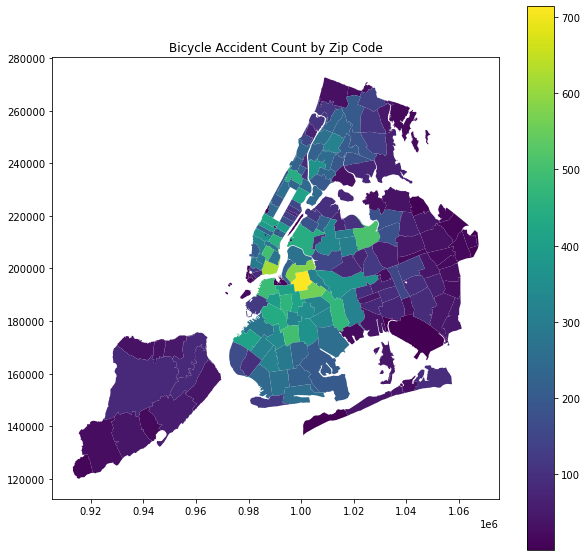

In [29]:
Accident_zipcodes.plot(figsize = (10,10),column = 'Accident Count',legend=True).set_title("Bicycle Accident Count by Zip Code")